# Customer Churn

## Setup Notebook

In [ ]:
# connect to google drive
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)
PATH = '/content/drive/MyDrive/Binar/Challenge 2'
os.chdir(PATH)

Mounted at /content/drive


## Import Libraries

In [ ]:
# import library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

## Load Dataset

### Train Dataset

In [ ]:
# define data
df_train = pd.read_csv("Data Train.csv")

In [ ]:
# show data
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
# numbers of rows and columns
df_train.shape

(4250, 20)

The data train has 4250 rows and 20 columns.

In [ ]:
# data info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

### Test Dataset

In [ ]:
# define data
df_test = pd.read_csv("Data Test.csv")

In [ ]:
# show data
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
# numbers of rows and columns
df_test.shape

(750, 20)

The data test has 750 rows and 20 columns.

In [ ]:
# data info
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

## Exploratory Data Analysis (EDA)

### Descriptive Statistics

In [ ]:
df_train.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.24,39.70,1.0,73.00,100.00,127.00,243.00
number_vmail_messages,4250.0,7.63,13.44,0.0,0.00,0.00,16.00,52.00
total_day_minutes,4250.0,180.26,54.01,0.0,143.33,180.45,216.20,351.50
total_day_calls,4250.0,99.91,19.85,0.0,87.00,100.00,113.00,165.00
total_day_charge,4250.0,30.64,9.18,0.0,24.36,30.68,36.75,59.76
total_eve_minutes,4250.0,200.17,50.25,0.0,165.92,200.70,233.78,359.30
total_eve_calls,4250.0,100.18,19.91,0.0,87.00,100.00,114.00,170.00
total_eve_charge,4250.0,17.02,4.27,0.0,14.10,17.06,19.87,30.54
total_night_minutes,4250.0,200.53,50.35,0.0,167.22,200.45,234.70,395.00
total_night_calls,4250.0,99.84,20.09,0.0,86.00,100.00,113.00,175.00


There are 4,250 data in each column with a total of 20 columns.

### Heatmap

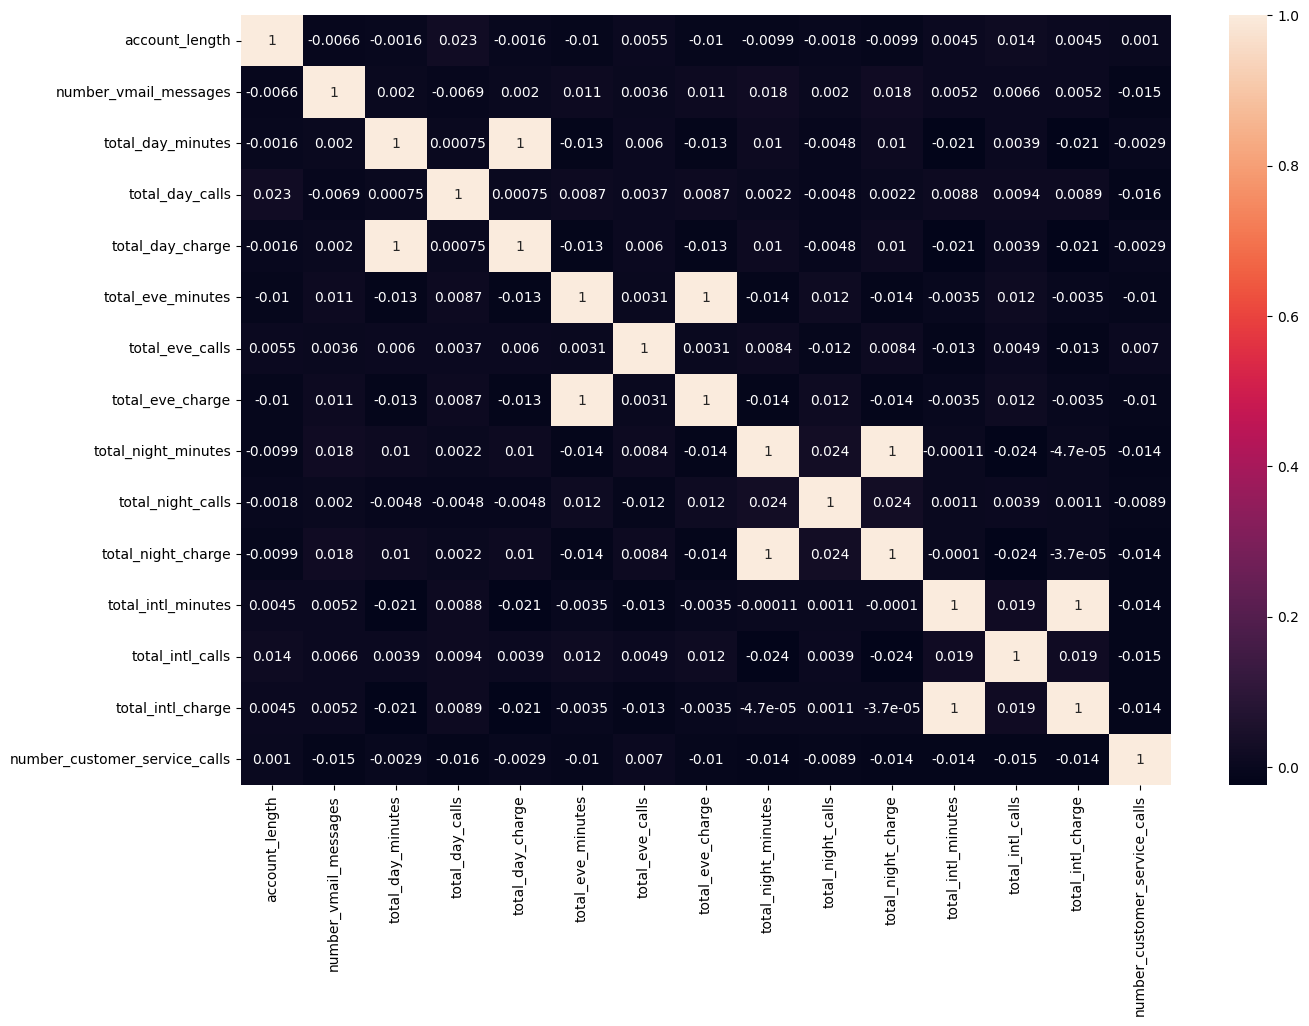

In [ ]:
# figure size
plt.figure(figsize=(15,10))

# heatmap
sns.heatmap(df_train.corr(), annot=True)

plt.show()

The data used are columns with a value of 1, namely total day minutes, total day charges, total eve minutes, total eve charges, total night minutes, total night charges, total intl minutes, and total intl charges.

### Pie Chart

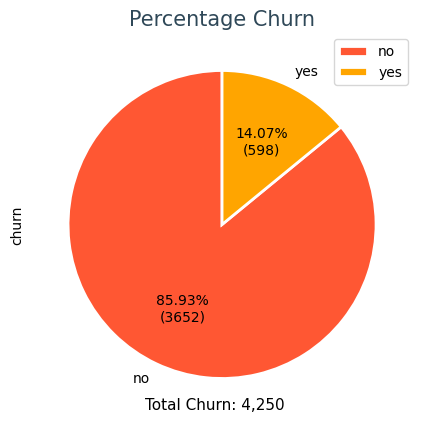

In [ ]:
# total churn
total_churn = df_train['churn'].value_counts().reset_index()

# color
colors = sns.color_palette(['#FF5733', '#FFA500'])[0:5]

# pie chart
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(aspect='equal'))
total_churn.set_index('index').plot.pie(y='churn', ax=ax, startangle=90, colors=colors,
                                        wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
                                        autopct=lambda p: "{:.2f}%\n({:.0f})".format(p, (p * total_churn['churn'].sum() / 100)),
                                        textprops=dict(color='k', fontsize=10))

plt.title('Percentage Churn', pad=5, fontsize=15, color='#2F4858')
plt.text(-0.5, -1.2, "Total Churn: " + str('{:,}'.format(total_churn['churn'].sum())), fontsize=11)
plt.show()

Only 14.07% or 589 customers had churn.

### Bar Chart

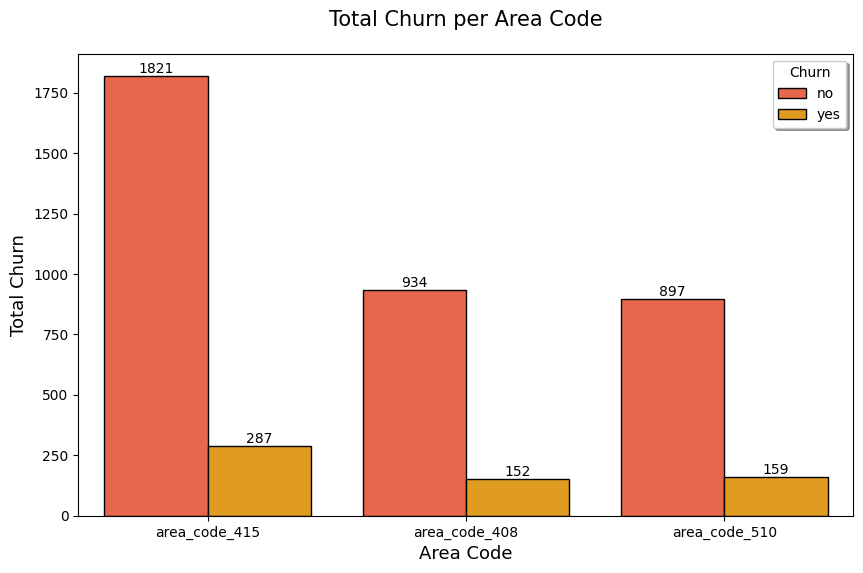

In [ ]:
# total churn per area code
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data = df_train, x='area_code', hue='churn', palette=['#FF5733', '#FFA500'], edgecolor='black')

# show bar labels
for i in ax.containers:
  ax.bar_label(i, label_type='edge')

plt.title('Total Churn per Area Code', pad=20, fontsize=15)
plt.xlabel('Area Code', fontsize=13)
plt.ylabel('Total Churn', fontsize=13)
plt.legend(title='Churn', shadow=True)
plt.show()

The most churn customers are in area code 415.

### Boxplot

In [ ]:
# split categorical and numerical
cat = df_train.select_dtypes(include='object').columns
num = df_train.select_dtypes(include='number').columns

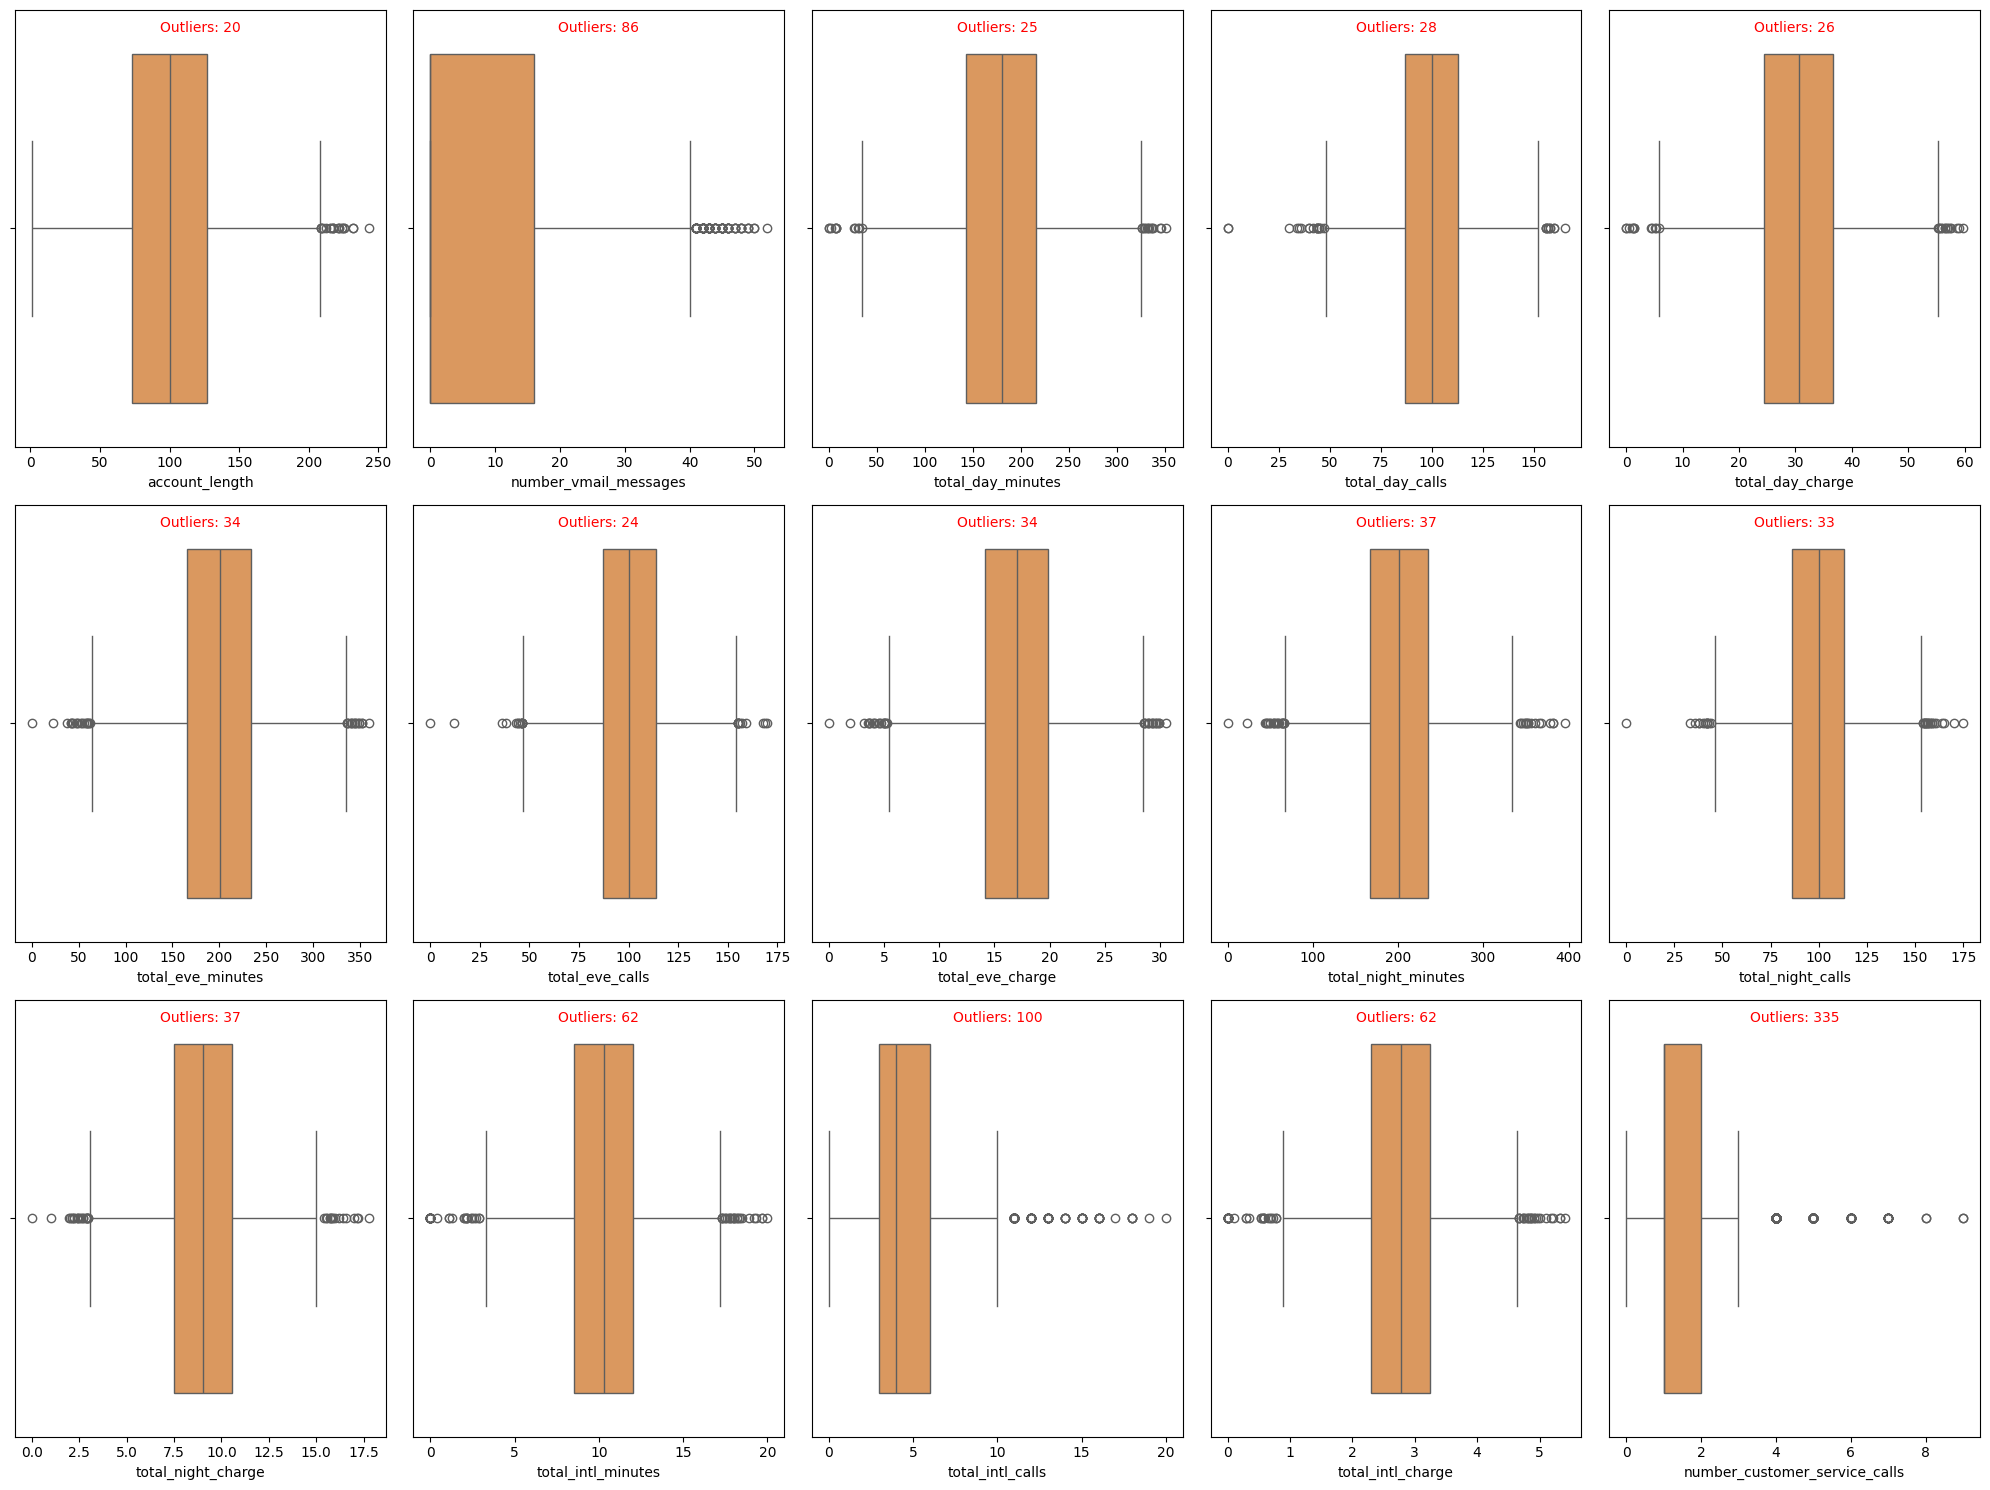

In [ ]:
# dataset
df_train_boxplot = df_train[num]

# subplot
num_rows = (len(df_train_boxplot.columns) + 2) // 5
fig, axes = plt.subplots(nrows=num_rows, ncols=5, figsize=(20,15))

for i, col in enumerate(df_train_boxplot.columns):
    ax = axes[i // 5, i % 5]
    # boxplot
    sns.boxplot(data=df_train_boxplot, x=col, ax=ax, color='#EE964B')
    # outlier
    outliers = df_train_boxplot[col][
        (df_train_boxplot[col] < df_train_boxplot[col].quantile(0.25) - 1.5 * (df_train_boxplot[col].quantile(0.75) - df_train_boxplot[col].quantile(0.25))) |
        (df_train_boxplot[col] > df_train_boxplot[col].quantile(0.75) + 1.5 * (df_train_boxplot[col].quantile(0.75) - df_train_boxplot[col].quantile(0.25)))
    ]
    num_outliers = len(outliers)
    ax.annotate(f'Outliers: {num_outliers}', xy=(0.5, 0.95), xycoords='axes fraction', ha='center', fontsize=10, color='red')

plt.tight_layout()
plt.show()

All the columns above have outliers.

### Histogram

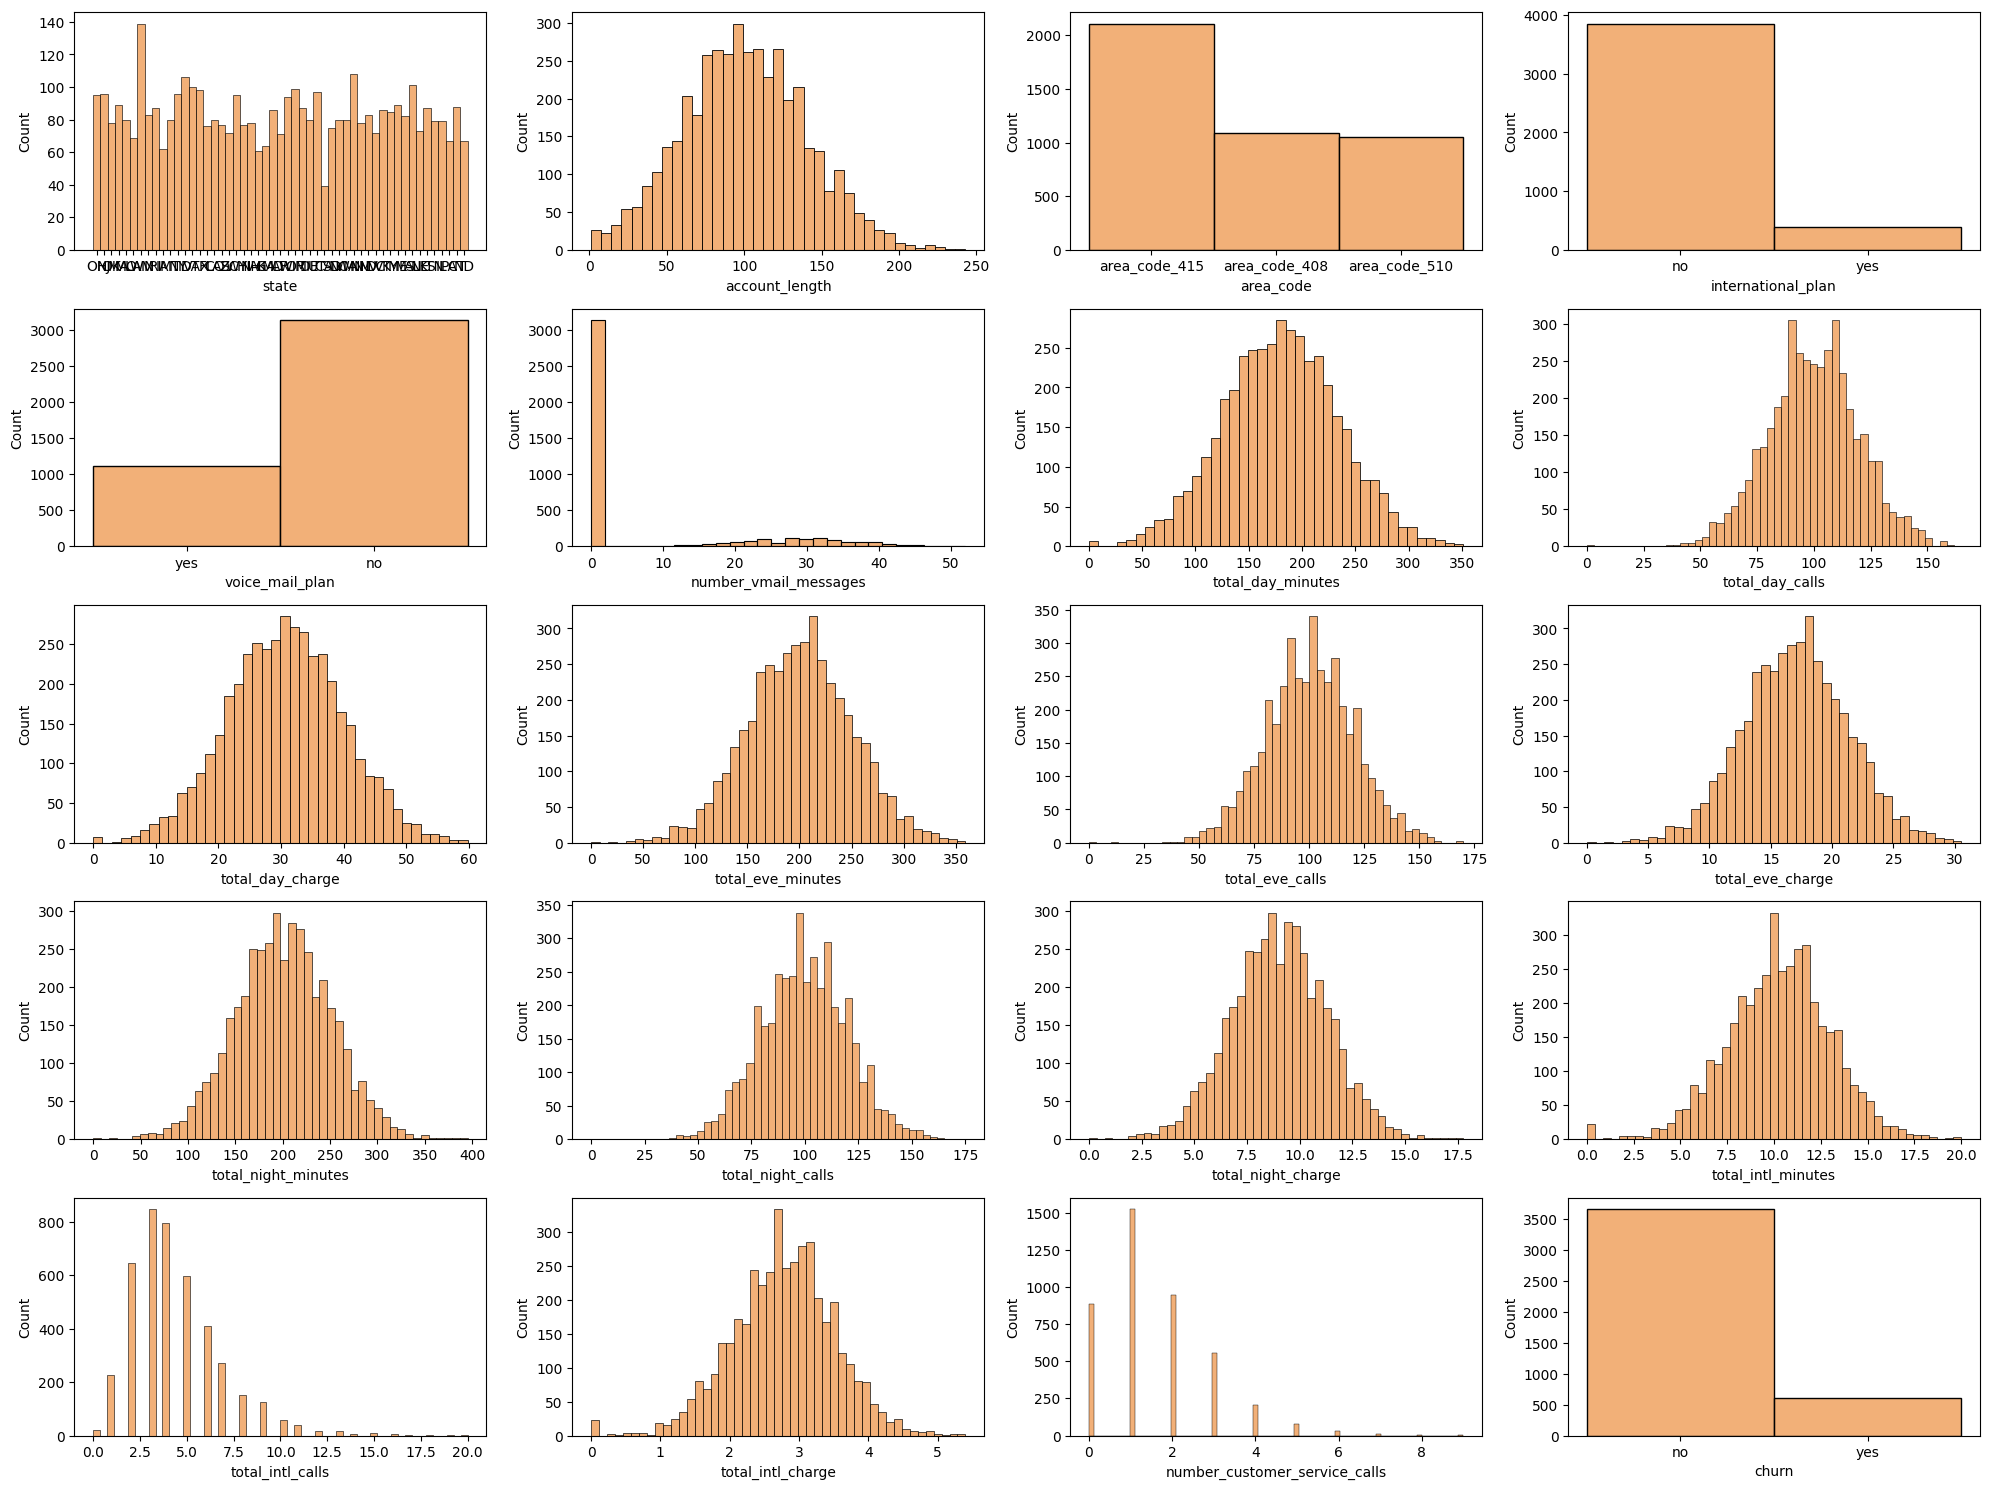

In [ ]:
# number of rows and set figure size
num_rows = (len(df_train.columns) + 2) // 4
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20,15))

# histogram
for i, col in enumerate(df_train.columns):
    sns.histplot(data=df_train, x=col, ax=axes[i // 4, i % 4], color='#EE964B')

plt.tight_layout()
plt.show()

Columns are mostly normally distributed.

### Heatmap

## Data Pre-Processing

### Missing Value

In [ ]:
df_train.isnull().sum().sum()

0

The data has no missing values.

### Duplicate Value

In [ ]:
df_train.duplicated().sum()

0

There is no duplication of data.

### Outlier Detection

In [ ]:
# count outliers in column
def count_outliers(column):
    Q1, Q3 = column.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    min_val = Q1 - 1.5 * IQR
    max_val = Q3 + 1.5 * IQR
    outliers_count = column[(column < min_val) | (column > max_val)].count()
    return outliers_count

# count outliers in all numerical columns
def count_all_outliers(dataframe):
    print('Jumlah outliers:\n')
    numerical_columns = dataframe.select_dtypes('number').columns
    for col in numerical_columns:
        outliers_count = count_outliers(dataframe[col])
        print(f'{col}: {outliers_count}')

# filter outliers
def filter_outliers(dataframe):
    numerical_columns = dataframe.select_dtypes('number').columns
    print(f'\nJumlah baris sebelum memfilter outlier: {len(dataframe)}')
    filtered_entries = dataframe.copy()
    for col in numerical_columns:
        Q1, Q3 = dataframe[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        low_limit = Q1 - (IQR * 1.5)
        high_limit = Q3 + (IQR * 1.5)
        filtered_entries = filtered_entries[(filtered_entries[col] >= low_limit) & (filtered_entries[col] <= high_limit)]

    print(f'Jumlah baris setelah memfilter outlier: {len(filtered_entries)}')
    return filtered_entries

count_all_outliers(df_train)
data_train = filter_outliers(df_train)

Jumlah outliers:

account_length: 20
number_vmail_messages: 86
total_day_minutes: 25
total_day_calls: 28
total_day_charge: 26
total_eve_minutes: 34
total_eve_calls: 24
total_eve_charge: 34
total_night_minutes: 37
total_night_calls: 33
total_night_charge: 37
total_intl_minutes: 62
total_intl_calls: 100
total_intl_charge: 62
number_customer_service_calls: 335

Jumlah baris sebelum memfilter outlier: 4250
Jumlah baris setelah memfilter outlier: 3515


### Normalization

In [ ]:
def normalization(train):
  num = train.select_dtypes('number').columns
  for col in num:
    train[col] = MinMaxScaler().fit_transform(train[col].values.reshape(len(train), 1))
  return train

In [ ]:
# show data
normalization(df_train)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,0.438017,area_code_415,no,yes,0.500000,0.459744,0.745455,0.459672,0.544114,0.605882,0.544204,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111,no
1,NJ,0.561983,area_code_415,no,no,0.000000,0.692461,0.690909,0.692436,0.337323,0.647059,0.337263,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000,no
2,OH,0.342975,area_code_408,yes,no,0.000000,0.851778,0.430303,0.851740,0.172279,0.517647,0.172233,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222,no
3,OK,0.305785,area_code_415,yes,no,0.000000,0.474253,0.684848,0.474230,0.412747,0.717647,0.412901,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333,no
4,MA,0.495868,area_code_510,no,yes,0.461538,0.620768,0.533333,0.620649,0.969942,0.635294,0.969876,0.538228,0.674286,0.538548,0.375,0.35,0.375926,0.333333,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,0.338843,area_code_415,no,no,0.000000,0.535704,0.424242,0.535643,0.678542,0.517647,0.678454,0.541013,0.451429,0.541362,0.515,0.30,0.514815,0.000000,no
4246,WV,0.297521,area_code_408,no,no,0.000000,0.506117,0.539394,0.506024,0.365154,0.482353,0.365095,0.471392,0.508571,0.471581,0.575,0.30,0.575926,0.333333,no
4247,NC,0.305785,area_code_408,no,no,0.000000,0.485633,0.612121,0.485609,0.537434,0.741176,0.537328,0.326835,0.594286,0.326956,0.345,0.35,0.344444,0.111111,no
4248,HI,0.202479,area_code_408,no,yes,0.769231,0.670555,0.769697,0.670515,0.620651,0.741176,0.620825,0.753165,0.662857,0.753517,0.495,0.25,0.494444,0.222222,no


The data above is normalized data with a scale between 0-1.

### Feature Encoding

In [ ]:
def feature_encoding(train):
  cat = train.select_dtypes('object').columns
  print('Data categorical: \n')
  for col in cat:
    print(col, df_train[col].unique())

  # label encoding
  for col in cat.drop(['area_code','state']):
    train[col] = LabelEncoder().fit_transform(train[col])

  # one-hot encoding
  for col in ['area_code']:
    onehots_area_code = pd.get_dummies(train[col], prefix=col)
    train = train.join(onehots_area_code)
    return train

  return train

In [ ]:
df_train = feature_encoding(df_train)

Data categorical: 

state ['OH' 'NJ' 'OK' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY' 'ID' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'SC' 'WY' 'HI' 'NH' 'AK' 'GA' 'MD' 'AR' 'WI' 'OR'
 'MI' 'DE' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'VT' 'KY' 'ME'
 'MS' 'AL' 'NE' 'KS' 'TN' 'IL' 'PA' 'CT' 'ND']
area_code ['area_code_415' 'area_code_408' 'area_code_510']
international_plan ['no' 'yes']
voice_mail_plan ['yes' 'no']
churn ['no' 'yes']


In [ ]:
# show data
df_train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,OH,0.438017,area_code_415,0,1,0.500000,0.459744,0.745455,0.459672,0.544114,...,0.588571,0.644344,0.685,0.15,0.685185,0.111111,0,0,1,0
1,NJ,0.561983,area_code_415,0,0,0.000000,0.692461,0.690909,0.692436,0.337323,...,0.594286,0.411930,0.610,0.25,0.609259,0.000000,0,0,1,0
2,OH,0.342975,area_code_408,1,0,0.000000,0.851778,0.430303,0.851740,0.172279,...,0.508571,0.498593,0.330,0.35,0.329630,0.222222,0,1,0,0
3,OK,0.305785,area_code_415,1,0,0.000000,0.474253,0.684848,0.474230,0.412747,...,0.691429,0.473270,0.505,0.15,0.505556,0.333333,0,0,1,0
4,MA,0.495868,area_code_510,0,1,0.461538,0.620768,0.533333,0.620649,0.969942,...,0.674286,0.538548,0.375,0.35,0.375926,0.333333,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,0.338843,area_code_415,0,0,0.000000,0.535704,0.424242,0.535643,0.678542,...,0.451429,0.541362,0.515,0.30,0.514815,0.000000,0,0,1,0
4246,WV,0.297521,area_code_408,0,0,0.000000,0.506117,0.539394,0.506024,0.365154,...,0.508571,0.471581,0.575,0.30,0.575926,0.333333,0,1,0,0
4247,NC,0.305785,area_code_408,0,0,0.000000,0.485633,0.612121,0.485609,0.537434,...,0.594286,0.326956,0.345,0.35,0.344444,0.111111,0,1,0,0
4248,HI,0.202479,area_code_408,0,1,0.769231,0.670555,0.769697,0.670515,0.620651,...,0.662857,0.753517,0.495,0.25,0.494444,0.222222,0,1,0,0


* International_plan, voice_mail_plan, and churn columns are done with label encoding.
* The area_code column is done with one-hot encoding.

### Drop Column

In [ ]:
unused_columns = ['state', 'area_code']
df_train.drop(columns=unused_columns, inplace=True)

In [ ]:
# data info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   float64
 1   international_plan             4250 non-null   int64  
 2   voice_mail_plan                4250 non-null   int64  
 3   number_vmail_messages          4250 non-null   float64
 4   total_day_minutes              4250 non-null   float64
 5   total_day_calls                4250 non-null   float64
 6   total_day_charge               4250 non-null   float64
 7   total_eve_minutes              4250 non-null   float64
 8   total_eve_calls                4250 non-null   float64
 9   total_eve_charge               4250 non-null   float64
 10  total_night_minutes            4250 non-null   float64
 11  total_night_calls              4250 non-null   float64
 12  total_night_charge             4250 non-null   f

Removing unnecessary columns, namely state and area_code.

### Split Train & Test

In [ ]:
# dataset
X = df_train.drop(['churn'], axis=1)
y = df_train['churn']

# split dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Split the data into train data and test data.

### Balancing Data

In [ ]:
print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))

# minority over sampling technique
sm = SMOTE(sampling_strategy=1, random_state=1)
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())

print('After upsampling count of label 0 {}'.format(sum(y_train==0)))
print('After upsampling count of label 1 {}'.format(sum(y_train==1)))

Before upsampling count of label 0 2550
Before upsampling count of label 1 425
After upsampling count of label 0 2550
After upsampling count of label 1 2550


Balancing the data in the churn column because the number of “no” data is more than “yes”.

### Feature Selection

In [ ]:
# fit the selector
selector = SelectKBest(score_func=chi2, k=10)
selector.fit(x_train, y_train)

# selected features
features_select = list(x_train.columns[selector.get_support(indices=True)])
print(features_select)

['international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_charge', 'total_eve_minutes', 'total_eve_charge', 'number_customer_service_calls', 'area_code_area_code_415', 'area_code_area_code_510']


The column names above are the most influential columns for improving accuracy values.

In [ ]:
# select important features
x_train = x_train[features_select]
x_test = x_test[features_select]

## Modeling

### Support Vector Machine

In [ ]:
# define pipeline
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True))
])

# define parameters
svm_param = {
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 'auto']
}

# grid
grid_search_svm = GridSearchCV(estimator=svm_pipe, param_grid=svm_param, cv=5, n_jobs=-1, verbose=1)
grid_search_svm.fit(x_train, y_train)

print("Best parameters: ", grid_search_svm.best_params_)
print("Best score: ", grid_search_svm.best_score_)

# best model
svm_best_model = grid_search_svm.best_estimator_

# accuracy
print('Accuracy: ', svm_best_model.score(x_test, y_test))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters:  {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best score:  0.8880392156862744
Accuracy:  0.8917647058823529


The best cross-validation score obtained was 0.88. Meanwhile, the accuracy on the test data is 0.89.

### Random Forest

In [ ]:
# define pipeline
rf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

# define parameters
rf_param = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__bootstrap': [True, False]
}

# grid
grid_search_rf = GridSearchCV(estimator=rf_pipe, param_grid=rf_param, cv=5, n_jobs=-1, verbose=1)
grid_search_rf.fit(x_train, y_train)

print("Best parameters: ", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)

# best model
rf_best_model = grid_search_rf.best_estimator_

# accuracy
print('Accuracy: ', rf_best_model.score(x_test, y_test))

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters:  {'rf__bootstrap': False, 'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}
Best score:  0.9219607843137256
Accuracy:  0.9090196078431373


The best cross-validation score obtained was 0.92. Meanwhile, the accuracy on the test data is 0.90.

## Evaluation

In [ ]:
# evaluation
def evaluation(train, x, y):
  evaluasi = pd.DataFrame()
  models = [svm_best_model, rf_best_model]
  algoritma = ['Support Vector Machine', 'Random Forest']
  for model, algoritma in zip(models, algoritma):
    y_predict = model.predict(x)
    nilai_metrik = [
        accuracy_score(y, y_predict)*100,
        precision_score(y, y_predict)*100,
        recall_score(y, y_predict)*100,
        f1_score(y, y_predict)*100
    ]
    hasil_evaluasi = pd.DataFrame({
        'data': train,
        'model': algoritma,
        'metrics': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'nilai': nilai_metrik
    })
    evaluasi = pd.concat([evaluasi, hasil_evaluasi])
  return evaluasi

In [ ]:
evaluasi_train = evaluation('train', x_train, y_train)
print(evaluasi_train)

    data                   model    metrics       nilai
0  train  Support Vector Machine   Accuracy   90.196078
1  train  Support Vector Machine  Precision   90.706910
2  train  Support Vector Machine     Recall   89.568627
3  train  Support Vector Machine   F1 Score   90.134175
0  train           Random Forest   Accuracy  100.000000
1  train           Random Forest  Precision  100.000000
2  train           Random Forest     Recall  100.000000
3  train           Random Forest   F1 Score  100.000000


* SVM has an accuracy value of 90% with a precision value of 90%, recall of 89%, and F1 Score of 90%.
* Random Forest has an accuracy, precision, recall, and F1 Score value of 100%.
* In this comparison, the Random Forest model is better than the SVM model.



## Confusion Matrix

### Support Vector Machine

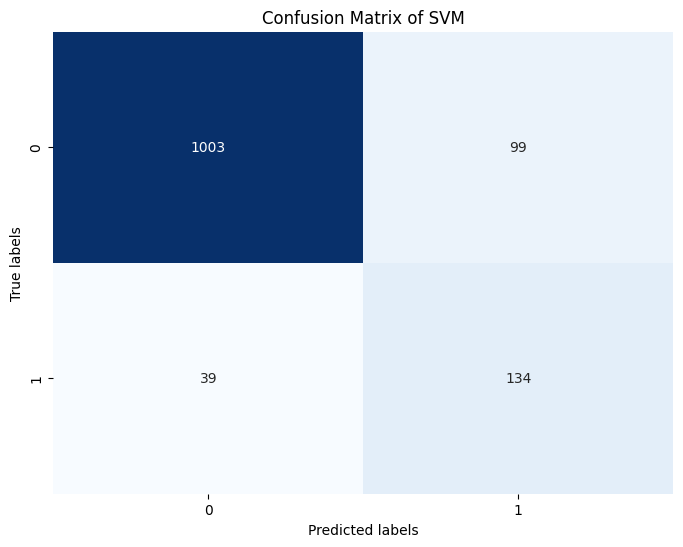

In [ ]:
# confusion matrix
y_pred_svm = svm_best_model.predict(x_test)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# plot
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of SVM')
plt.show()

* A value of 1003 indicates the number of correct negative predictions.
* A value of 99 indicates the number of incorrect positive predictions.
* A value of 39 indicates the number of incorrect negative predictions.
* A value of 134 indicates the number of correct positive predictions.

### Random Forest

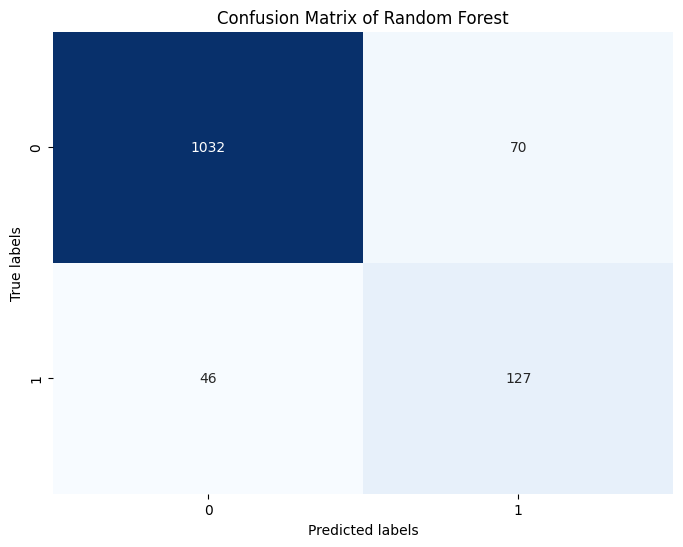

In [ ]:
# confusion matrix
y_pred_rf = rf_best_model.predict(x_test)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# plot
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Random Forest')
plt.show()

* A value of 1032 indicates the number of correct negative predictions.
* A value of 70 indicates the number of incorrect positive predictions.
* A value of 46 indicates the number of incorrect negative predictions.
* A value of 127 indicates the number of correct positive predictions.

## Learning Curve

### Support Vector Machine

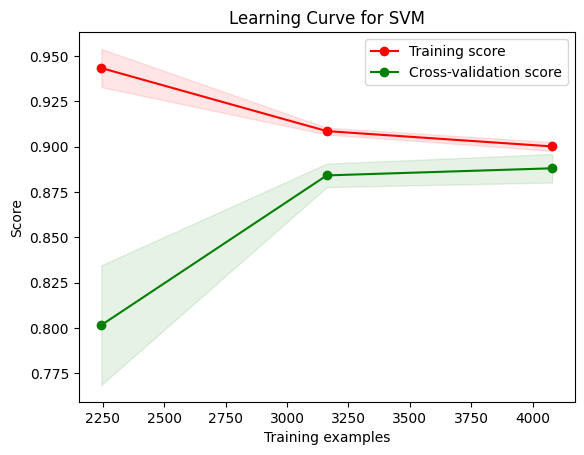

In [ ]:
# define a function to plot the learning curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# show plot
plot_learning_curve(svm_best_model, "Learning Curve for SVM", x_train, y_train, cv=5)
plt.show()

The model does not occur underfitting or overfitting because the cross-validation score increases and approaches the training score.

### Random Forest

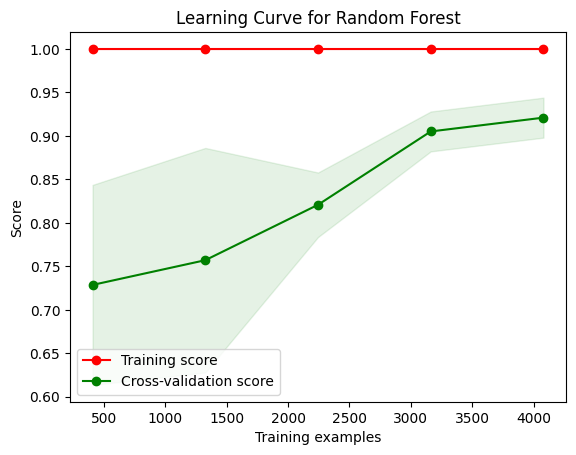

In [ ]:
# define a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# show plot
plot_learning_curve(rf_best_model, "Learning Curve for Random Forest", x_train, y_train, cv=5, n_jobs=-1)
plt.show()

The model tends to be overfitting because the distance between the cross-validation score and the training score is quite large.

## Conclusion

Based on the performance evaluation results of the Support Vector Machine and Random Forest models, it can be concluded that the Support Vector Machine is the best model in determining customer churn. Support Vector Machine tends to be able to predict customer churn during training with an accuracy of 90%. Meanwhile, Random Forest tends to experience overfitting.